In [ ]:
#install them dependencies

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix 

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving hackUMBC_MLPc_dataset_refined.csv to hackUMBC_MLPc_dataset_refined.csv


In [ ]:
#load the data to dfraud
dfraud = pd.read_csv("hackUMBC_MLPc_dataset_refined.csv")


In [ ]:
#take a looksy at the data; "Is_declined, isForeignTransaction, isHighRiskCountry, isFradulent" - have either 1 or 0, 1 = yes and 0 = no
#dfraud.head()
dfraud.tail()

,Merchant_id,TransactionDate,AverageAmount/transaction/day,Transaction_amount,Is_declined,Total_number_of_declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFraudulent
3070,6661273532,NaN,500.0,11000.0,1.0,0.0,0.0,0.0,754.0,585.0,7.0,0.0
3071,6661273532,NaN,800.0,0.0,1.0,0.0,0.0,0.0,754.0,585.0,7.0,0.0
3072,6661273533,NaN,800.0,20800.0,1.0,0.0,0.0,0.0,754.0,585.0,7.0,0.0
3073,6661273532,NaN,1500.0,12000.0,1.0,0.0,1.0,1.0,754.0,585.0,7.0,0.0
3074,6661273533,NaN,1500.0,36000.0,1.0,0.0,1.0,1.0,754.0,585.0,7.0,0.0


In [ ]:
#another looksy at the data
dfraud.sample

<bound method NDFrame.sample of       Merchant_id  TransactionDate  ...  6-month_chbk_freq  isFraudulent
0      3160040998              NaN  ...                0.0           1.0
1      3160040998              NaN  ...                0.0           1.0
2      3160041896              NaN  ...                0.0           1.0
3      3160141996              NaN  ...                0.0           1.0
4      3160241992              NaN  ...                6.0           1.0
...           ...              ...  ...                ...           ...
3070   6661273532              NaN  ...                7.0           0.0
3071   6661273532              NaN  ...                7.0           0.0
3072   6661273533              NaN  ...                7.0           0.0
3073   6661273532              NaN  ...                7.0           0.0
3074   6661273533              NaN  ...                7.0           0.0

[3075 rows x 12 columns]>

In [ ]:
#split dataset in features and target variable
feature_cols = ['Transaction_amount', 'Is_declined', 'Total_number_of_declines/day', 'isForeignTransaction', 'isHighRiskCountry'] 
X = dfraud[feature_cols] # Features
Y = dfraud.isFraudulent # Target variable

In [ ]:
# split X and Y into training and testing sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
# import the class and create classifier/model
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(30, 30, 20),activation='relu',random_state=101)


In [ ]:
#train that model
model.fit(X_train, Y_train)  


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=101, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#predict
Y_predict = model.predict(X_test)

In [ ]:
# import confusion_matrix and classification_report classes
from sklearn.metrics import classification_report, confusion_matrix  


In [ ]:
#computer performance measures
print(confusion_matrix(Y_test, Y_predict))  
print(classification_report(Y_test, Y_predict))  

[[664   0]
 [105   0]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       664
         1.0       0.00      0.00      0.00       105

    accuracy                           0.86       769
   macro avg       0.43      0.50      0.46       769
weighted avg       0.75      0.86      0.80       769



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
#Calculate performance measures:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_predict))
print("Precision:",metrics.precision_score(Y_test, Y_predict))
print("Recall:",metrics.recall_score(Y_test, Y_predict))

Accuracy: 0.8634590377113134
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


([<matplotlib.axis.YTick at 0x7ff10d006908>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

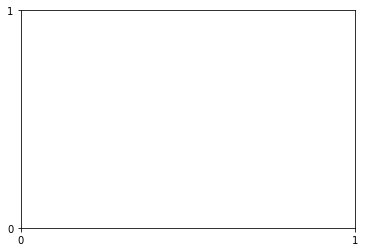

In [ ]:
class_names=[0,1] # name  of classes for yes and no instances within the dataset.
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

Text(0.5, 15.0, 'Predicted label')

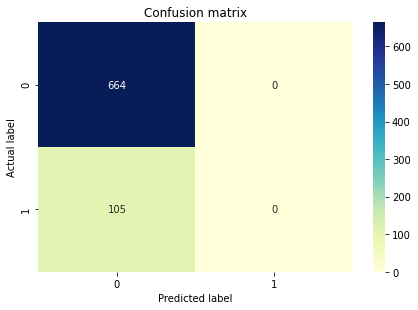

In [ ]:
# create heatmap
cnf_matrix =confusion_matrix(Y_test, Y_predict)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

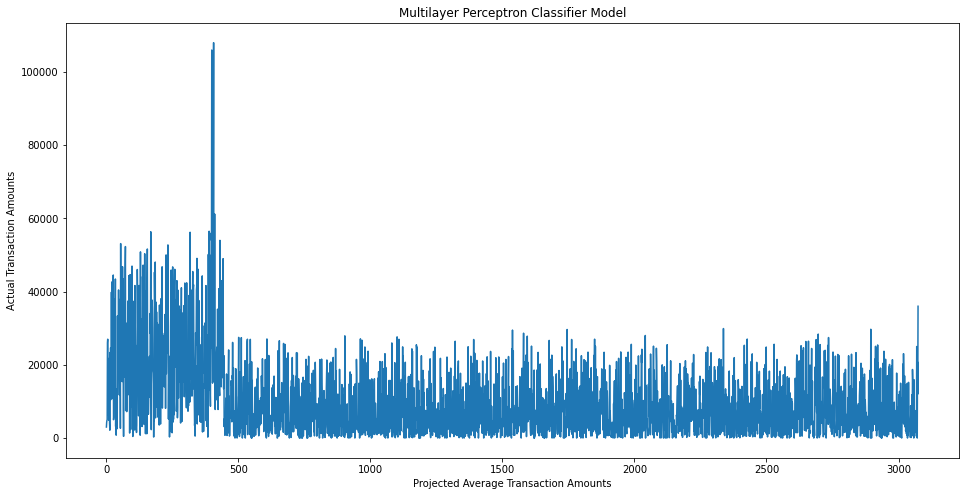

In [ ]:
#visualize the data
predictions = model

valid = dfraud[X.shape[0]:]
#valid['isFraudulent'] = predictions
plt.figure(figsize=(16,8))
plt.title('Multilayer Perceptron Classifier Model')
plt.xlabel('Projected Average Transaction Amounts')
plt.ylabel('Actual Transaction Amounts')
plt.plot(dfraud['Transaction_amount'])
plt.plot(valid[['isFraudulent']])
#plt.legend(['Orig', 'Val', 'Pred'])
plt.show()